In [1]:
#Import Important libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the training data
bikehour = pd.read_csv('hour.csv')
bikehour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bikeday = pd.read_csv('day.csv')
bikeday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Shape of the dataset
bikeday.shape

(731, 16)

In [5]:
#Shape of the dataset
bikehour.shape

(17379, 17)

In [6]:
#Data types
bikeday.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
#Data types
bikehour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
#Rename the columns as its been mess in the dataset for names
bikeday.rename(columns={'dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather',
                       'hum':'humidity','cnt':'count'},inplace=True)
bikehour.rename(columns={'dteday':'datetime','yr':'year','hr': 'hour','mnth':'month','weathersit':'weather',
                       'hum':'humidity','cnt':'count'},inplace=True)

In [9]:
#Read the data
bikeday.head(5)

,instant,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
#Read the data
bikehour.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
#Missing values in dataset
bikeday.isnull().sum()

instant       0
datetime      0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
#Missing values in dataset
bikehour.isnull().sum()

instant       0
datetime      0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
#Type casting the datetime and numerical attributes to category and converting to categorical variable
bikeday['datetime']=pd.to_datetime(bikeday.datetime)
bikeday['season']=bikeday.season.astype('category')
bikeday['year']=bikeday.year.astype('category')
bikeday['month']=bikeday.month.astype('category')
bikeday['holiday']=bikeday.holiday.astype('category')
bikeday['weekday']=bikeday.weekday.astype('category')
bikeday['workingday']=bikeday.workingday.astype('category')
bikeday['weather']=bikeday.weather.astype('category')

In [14]:
#Dropping of unwanted columns
bikeday = bikeday.drop(["instant","datetime"],axis = 1)

In [15]:
#Summary of the dataset
bikeday.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


[Text(0.5, 1.0, 'Bike usage during weekdays and weekends')]

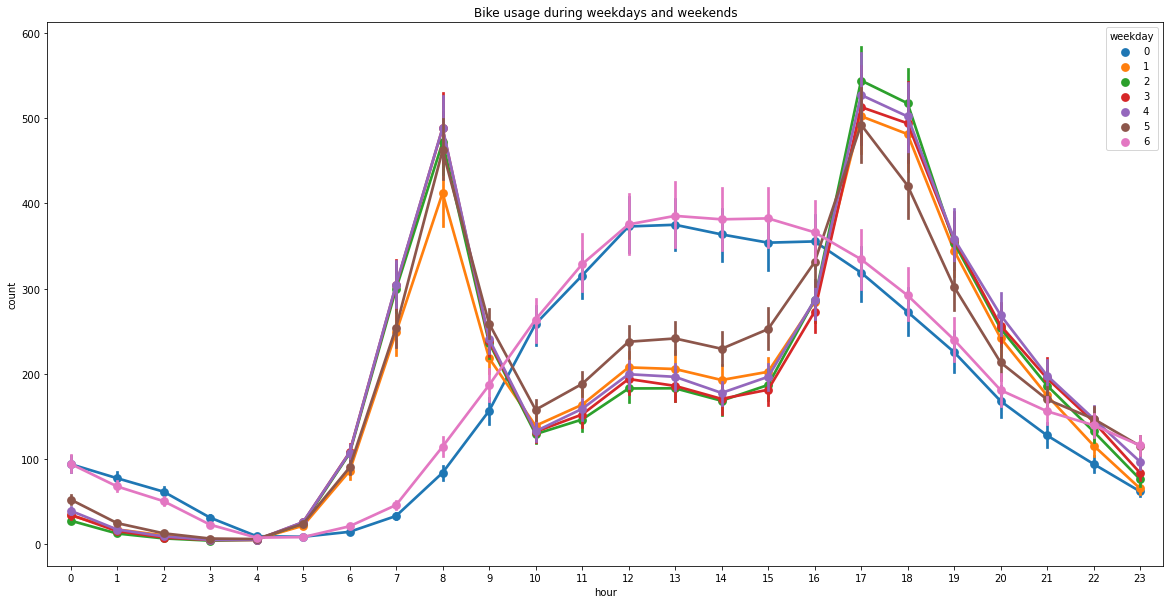

In [16]:
# Visualizing the usage of bike during weekday and weekends and the graph shows that the bikes are rented more
# during weekdays than weekends. The bike are used mostly during office hours .
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=bikehour[['hour','count','weekday']],
            x='hour', y='count',
            hue='weekday', ax=ax, aspect=.5)
ax.set(title="Bike usage during weekdays and weekends")

[Text(0.5, 1.0, 'Bike usage during different weather condition')]

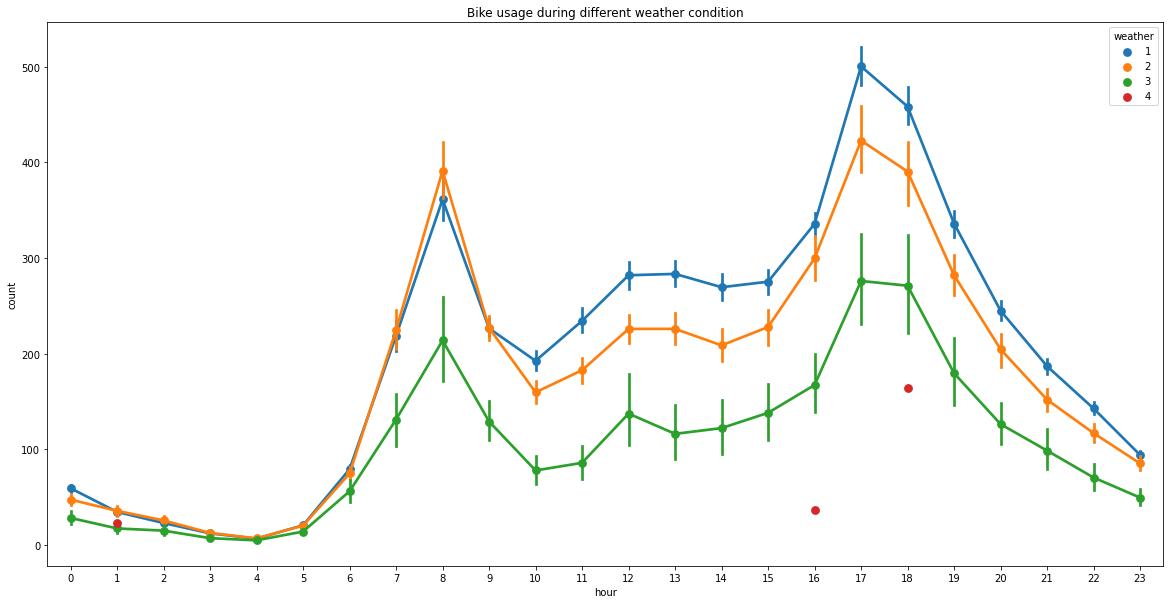

In [17]:
# Visualizing the usage of bike during different weather conditions and the graph shows that the bikes are rented
# more during weekdays than weekends. The use of bike declines once the weather condition becomes bad and there is
# almost negligible data during heavy snow and thunderstrom. 
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=bikehour[['hour','count','weather']],
            x='hour', y='count',
            hue='weather', ax=ax, aspect=.8)
ax.set(title="Bike usage during different weather condition")

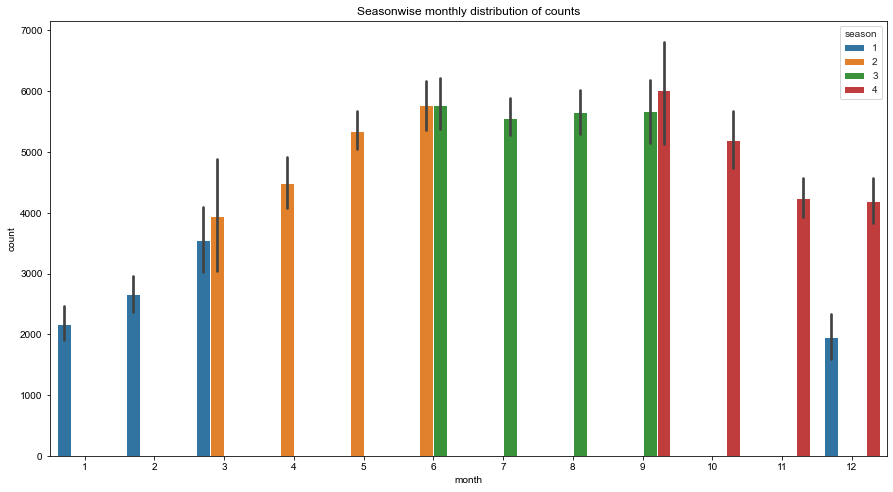

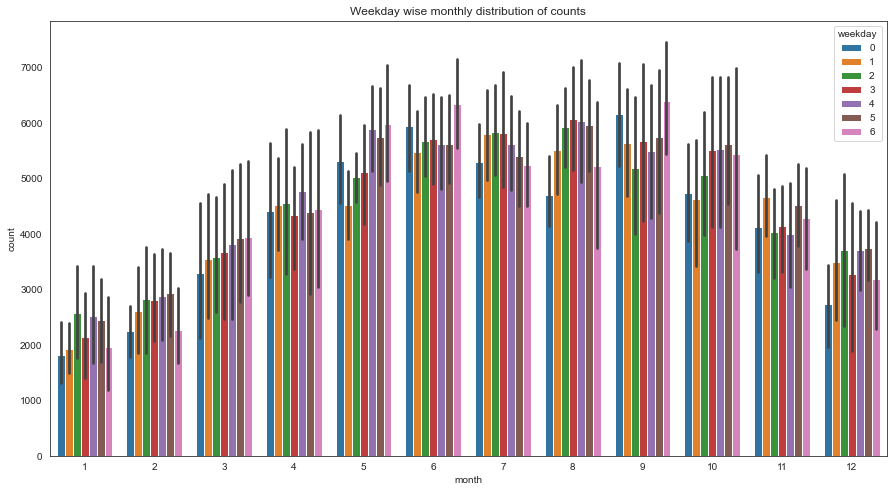

In [18]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='count',data=bikeday[['month','count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='count',data=bikeday[['month','count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

[Text(0.5, 0, 'workingday'),
 Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'Boxplot for count vs workingday')]

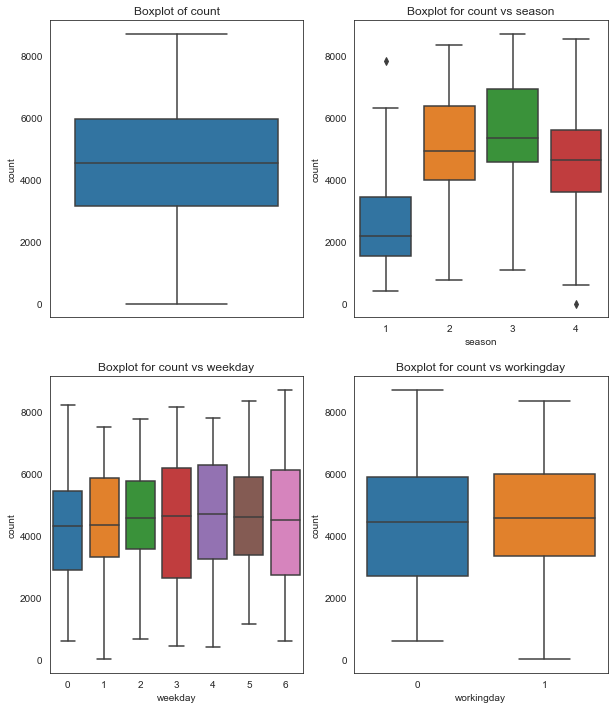

In [19]:
#Outliers Analysis
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,12)
sns.boxplot(data=bikeday,y="count",orient='v',ax=axes[0][0])
sns.boxplot(data=bikeday,y="count",x="season",orient='v',ax=axes[0][1])
sns.boxplot(data=bikeday,y="count",x="weekday",orient="v",ax=axes[1][0])
sns.boxplot(data=bikeday,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='count',title = "Boxplot of count")
axes[0][1].set(xlabel="season",ylabel="count",title="Boxplot for count vs season")
axes[1][0].set(xlabel="weekday", ylabel="count",title="Boxplot for count vs weekday")
axes[1][1].set(xlabel="workingday",ylabel="count",title="Boxplot for count vs workingday")

Text(0.5, 1.0, 'Boxplot of count vs weather')

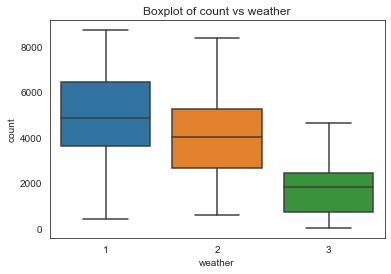

In [20]:
#From the below boxplots, it is evident that there are no outliers present in the count. Two things are clear.
#Count is very low in spring season.
#Count is maximum when weather is good and its minimum weather is bad.

fig.set_size_inches(8,12)
sns.boxplot(data=bikeday, x="weather",y="count").set_title("Boxplot of count vs weather")

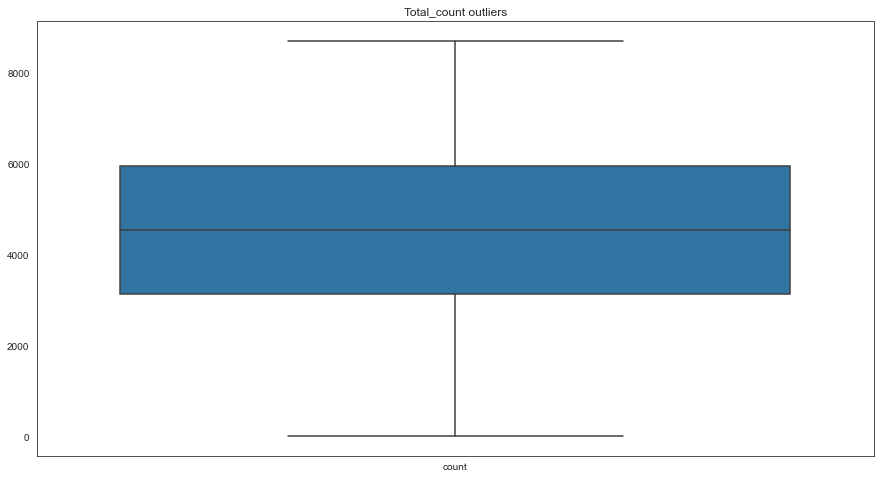

In [21]:
#From the box plot, we can observed that no outliers are present in count variable.
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for count outliers
sns.boxplot(data=bikeday[['count']])
ax.set_title('Total_count outliers')
plt.show()

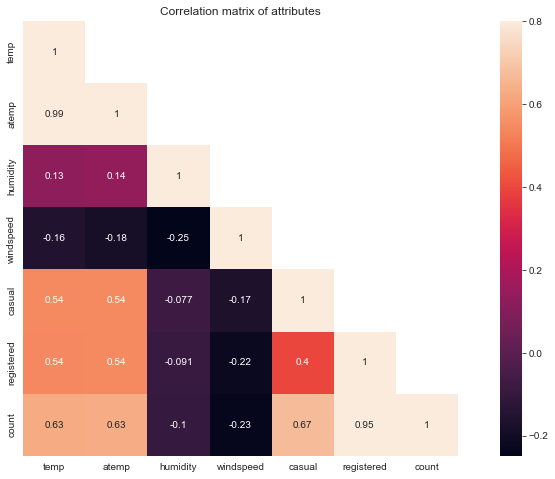

In [22]:
#Create the correlation matrix
correMtr=bikeday[["temp","atemp","humidity","windspeed","casual","registered","count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

#From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. 
#The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.
#The total_count,casual and registered are highly positively correlated to each other. 
#So, I will be going to ignore atemp,casual and registered variable for further analysis.

<AxesSubplot:xlabel='windspeed', ylabel='count'>

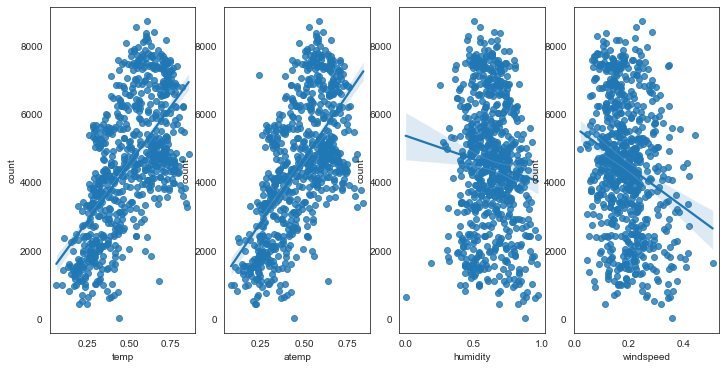

In [23]:
## Bivariate analysis of count and continous predictor
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(12,6)

sns.regplot(x="temp",y="count",data=bikeday,ax=ax1)
sns.regplot(x="atemp",y="count",data=bikeday,ax=ax2)
sns.regplot(x="humidity",y="count",data=bikeday,ax=ax3)
sns.regplot(x="windspeed",y="count",data=bikeday,ax=ax4)

#From the above plot, it is evident that count has a positive linear relationship with temp and atemp. 
#On the other hand, count has a negative linear relationship with windspeed. 
#Humidity(hum) has a little negative linear relationship with count.

C:\Users\prati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.10612952, -2.83371839, -2.68121219, -2.57340905, -2.48915191,
         -2.41955673, -2.36001798, -2.30782877, -2.26125818, -2.21912992,
         -2.18060696, -2.14507173, -2.11205508, -2.08119197, -2.05219258,
         -2.0248228 , -1.99889075, -1.97423711, -1.95072808, -1.92825019,
         -1.90670633, -1.88601273, -1.8660966 , -1.84689427, -1.82834975,
         -1.81041348, -1.79304141, -1.77619419, -1.75983653, -1.74393663,
         -1.72846577, -1.71339788, -1.69870925, -1.68437825, -1.67038506,
         -1.6567115 , -1.64334086, -1.63025771, -1.6174478 , -1.60489794,
         -1.59259587, -1.58053022, -1.56869036, -1.55706641, -1.54564912,
         -1.53442983, -1.52340042, -1.51255328, -1.50188124, -1.49137757,
         -1.4810359 , -1.47085025, -1.46081495, -1.45092464, -1.44117426,
         -1.431559  , -1.4220743 , -1.41271583, -1.40347947, -1.39436132,
         -1.38535765, -1.3764649 , -1.36767969, -1.35899879, -1.35041911,
         -1.3419377 , -1.33355173, -1.

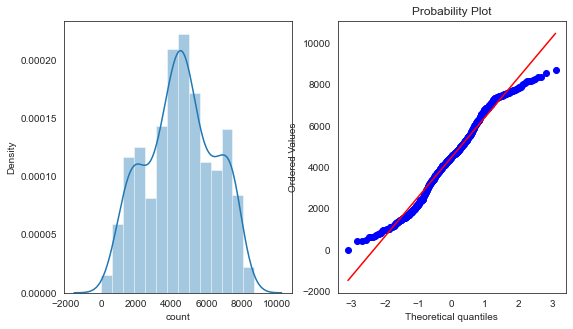

In [24]:
#Distribution of target Variable
from scipy import stats
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(9,5)
sns.distplot(bikeday["count"],ax=ax1)
stats.probplot(bikeday["count"], dist='norm', fit=True, plot=ax2)

#As we can see, out cnt variable is very close to normal distribution.
#Preprocessing original data and Spliting into train and test data

In [25]:
#Importing important library for modelling
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [26]:
# selecting predictors
train_feature_space = bikeday.iloc[:,bikeday.columns != 'count']
# selecting target class
target_class = bikeday.iloc[:,bikeday.columns == 'count']

#droping atemp due to multicollinearity
#droping casual and registered because there sum is equal to target variable ie. 'count'
train_feature_space = train_feature_space.drop(["atemp","casual","registered"],axis = 1)
train_feature_space.shape

(731, 10)

In [27]:
# creating training and test set
training_set, test_set, train_taget, test_target = train_test_split(train_feature_space,
                                                                    target_class,
                                                                    test_size = 0.30, 
                                                                    random_state = 456)

# Cleaning test sets to avoid future warning messages
train_taget = train_taget.values.ravel() 
test_target = test_target.values.ravel()

In [28]:
# Model1 Linear Regression Model

# Initialize logistic regression model
lModel = LinearRegression()
lModel.fit(X = training_set,y = np.log(train_taget))

LinearRegression()

In [29]:
# Predicting using linear regression
lmPredictions = lModel.predict(X=test_set)
x=pd.DataFrame(np.exp(lmPredictions))


In [30]:
from math import sqrt
x=pd.DataFrame(np.exp(lmPredictions))
lm_errors = abs(np.exp(lmPredictions) - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(lm_errors), 2), 'degrees.')
#Print out root mean square error.
rmse = sqrt(mean_squared_error(test_target, np.exp(lmPredictions)))
print("RMSE for test set in linear regression is :" , rmse)

Mean Absolute Error: 899.5 degrees.
RMSE for test set in linear regression is : 1222.1581373120373


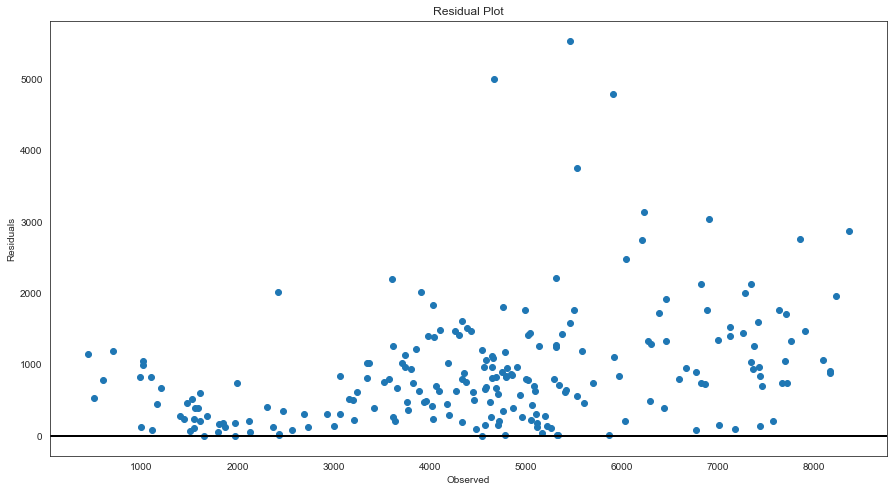

In [31]:
#Residual plot tells about finite variance between actual target value and predicted target value.
#In this plot,very less data points are have same finite variance between them and for most are not have it.

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(test_target,lm_errors)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

In [32]:
# Model 2 Random Forest
rf = RandomForestRegressor(random_state=12345)

In [33]:
import time
np.random.seed(12)
start = time.time()

# Selecting best max_depth, maximum features, split criterion and number of trees
param_dist = {'max_depth': [2,4,6,8,10],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2',None],
              "n_estimators" : [100 ,200 ,300 ,400 ,500]
             }
cv_randomForest = RandomizedSearchCV(rf, cv = 10,
                     param_distributions = param_dist, 
                     n_iter = 10)

cv_randomForest.fit(training_set, train_taget)
print('Best Parameters using random search: \n', 
      cv_randomForest.best_params_)
end = time.time()
print('Time taken in random search: {0: .2f}'.format(end - start))

Best Parameters using random search: 
 {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 8, 'bootstrap': False}
Time taken in random search:  57.78


In [34]:
# Setting parameters

# Set best parameters given by random search

rf.set_params( max_features = 'log2',
               max_depth =8 ,
               n_estimators = 300
                )

RandomForestRegressor(max_depth=8, max_features='log2', n_estimators=300,
                      random_state=12345)

In [35]:
##Fit the trained model
rf.fit(training_set, train_taget)

RandomForestRegressor(max_depth=8, max_features='log2', n_estimators=300,
                      random_state=12345)

In [36]:
# Use the forest's predict method on the test data
rfPredictions = rf.predict(test_set)
# Calculate the absolute errors
rf_errors = abs(rfPredictions - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_errors), 2), 'degrees.')

# Print out root mean square error.
rmse_rf = sqrt(mean_squared_error(test_target, rfPredictions))
print("RMSE for test set in random forest regressor  is :" , rmse_rf)

Mean Absolute Error: 495.28 degrees.
RMSE for test set in random forest regressor  is : 649.6911207838448


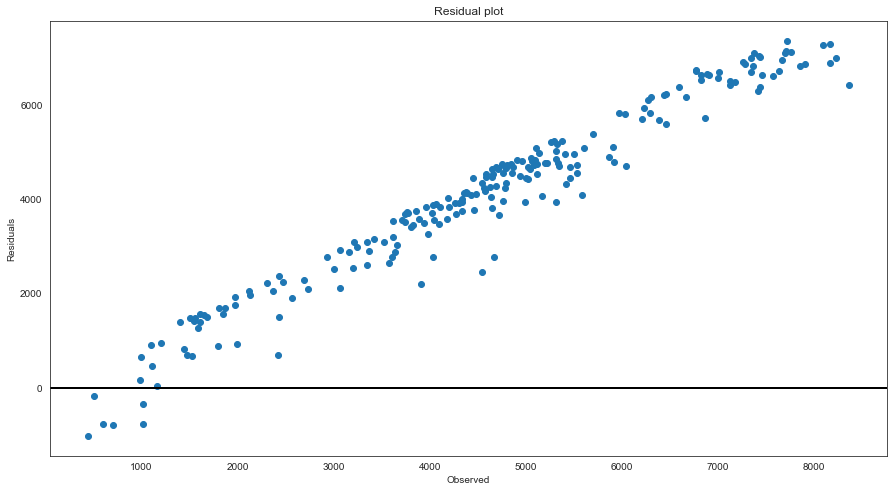

In [37]:
#Residual scatter plot
fig, ax = plt.subplots(figsize=(15,8))
residuals=test_target-rf_errors
ax.scatter(test_target, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()

#Cross validation prediction plot tells about finite variance between actual target value and predicted target value.
#In this plot,some data points are have same finite variance between them and for some are not have it.

<AxesSubplot:>

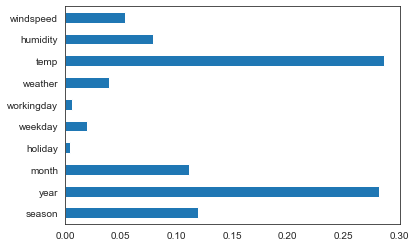

In [38]:
# Variable importance for random forest
feature_importance =  pd.Series(rf.feature_importances_, index=training_set.columns)
feature_importance.plot(kind='barh')

In [39]:
# Random forest accuracy score
rf_score =rf.score(training_set,train_taget)
print('Accuracy of the Random forest model :',rf_score)

Accuracy of the Random forest model : 0.9602834770728458


In [40]:
# Model 3 Decision tree regressor

from sklearn.tree import DecisionTreeRegressor
##training the model
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)
#Fit the trained model
dtr.fit(training_set,train_taget)
dtr_pred=dtr.predict(test_set)

In [41]:
# Print out the mean absolute error (mae)
dtr_errors = abs(dtr_pred - test_target)
print('Mean Absolute Error:', round(np.mean(dtr_errors), 2), 'degrees.')

## Print out root mean square error.
rmse_dtr = sqrt(mean_squared_error(test_target, dtr_pred))
print("RMSE for test set in Decision Tree regressor  is :" , rmse_dtr)

Mean Absolute Error: 685.34 degrees.
RMSE for test set in Decision Tree regressor  is : 885.6650294379155


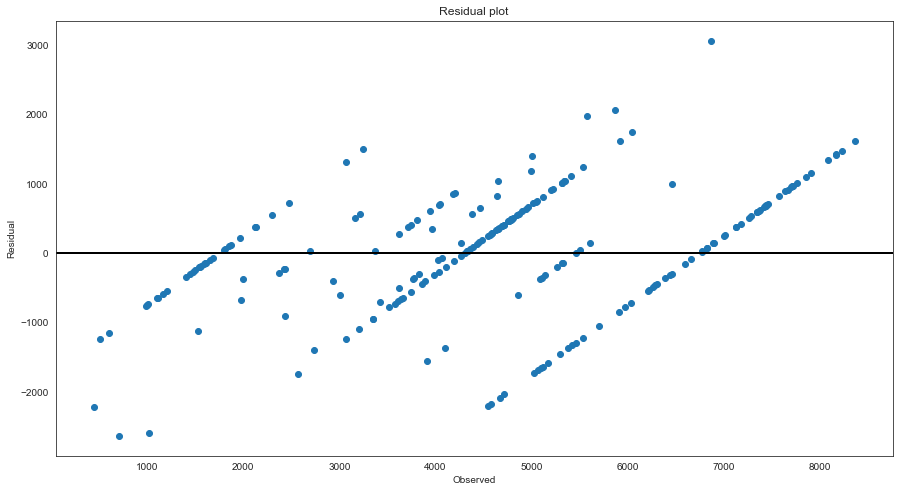

In [42]:
# Residual plot tells about finite variance between actual target value and predicted target value. 
#In this plot, some data points are have same finite variance between them and for some are not have it.

residuals = test_target-dtr_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(test_target, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

In [43]:
#Decision tree regression accuracy score
dtr_score =dtr.score(training_set,train_taget)
print('Accuracy of the model :',dtr_score)

Accuracy of the model : 0.8147538442397121


In [44]:
# Final model for predicting the bike rental count on daily basis.
# When we compare the root mean squared error and mean absolute error of all 3 models, the random forest model has less root mean squared error and mean absolute error. 
# So, finally I concluded Random forest model is bset for predicting the bike rental count on daily basis.